<img src="https://github.com/aminizahra/ML_AI2YOU/blob/main/AI2YOU.png?raw=true" alt="AI2YOU" width="300" height="300">
<h1 align="center"><font size = 14>Hands-On Machine Learning</font></h1>
<br>
<h2 align="center"><font size = 5>Naive Bayes classifier</font></h2>
<h3 align="center">Zahra Amini</h3>
<br>
<br>
<br>
<br>
<br>

# Step0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import RobustScaler

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Step1: Read Data

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

In [5]:
df.columns = col_names

In [6]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Step2: Data Analysis

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
df['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

# Step3: Categorical

In [9]:
df_num = df.select_dtypes(exclude='object')

df_obj = df.select_dtypes(include='object')

In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32560 non-null  int64
 1   fnlwgt          32560 non-null  int64
 2   education_num   32560 non-null  int64
 3   capital_gain    32560 non-null  int64
 4   capital_loss    32560 non-null  int64
 5   hours_per_week  32560 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [11]:
df_obj = pd.get_dummies(df_obj, drop_first=True)

In [12]:
df_new = pd.concat([df_num, df_obj], axis=1)

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Columns: 101 entries, age to income_ >50K
dtypes: int64(6), uint8(95)
memory usage: 4.4 MB


In [14]:
df_new.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [15]:
df = df_new

# Step4: X, y

In [17]:
X = df.drop('income_ >50K', axis=1)

In [18]:
y = df['income_ >50K']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step5: Scaling

In [20]:
scaler = RobustScaler()

In [21]:
scaler.fit(X_train)

RobustScaler()

In [22]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

# Step6: Naive Bayes

In [23]:
bayes = GaussianNB()

In [24]:
bayes.fit(X_train, y_train)

GaussianNB()

In [27]:
(bayes.var_).shape

(2, 100)

In [28]:
y_pred = bayes.predict(X_test)

In [29]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=uint8)

In [30]:
accuracy_score(y_test, y_pred)

0.8276003276003276

In [31]:
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[6303, 1092],
       [ 592, 1781]], dtype=int64)

<Axes: >

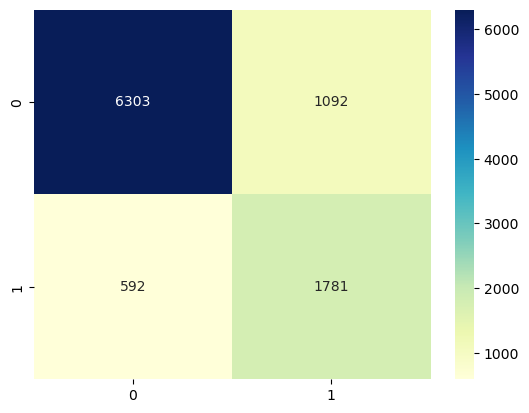

In [34]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices 

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      7395
           1       0.62      0.75      0.68      2373

    accuracy                           0.83      9768
   macro avg       0.77      0.80      0.78      9768
weighted avg       0.84      0.83      0.83      9768

